In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium import plugins

In [3]:
# 데이타 불러오기
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [8]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [12]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

In [14]:
df.shape

(17000, 9)

In [49]:
# 결측치 없음
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [50]:
df.head(500)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -114.31     34.19                15.0       5612.0          1283.0   
1      -114.47     34.40                19.0       7650.0          1901.0   
2      -114.56     33.69                17.0        720.0           174.0   
3      -114.57     33.64                14.0       1501.0           337.0   
4      -114.57     33.57                20.0       1454.0           326.0   
..         ...       ...                 ...          ...             ...   
495    -116.99     33.75                18.0       9601.0          2401.0   
496    -116.99     33.73                13.0      16148.0          3474.0   
497    -116.99     33.46                13.0       1614.0           410.0   
498    -116.99     32.96                17.0       5509.0           866.0   
499    -116.99     32.85                32.0       5211.0           949.0   

     population  households  median_income  median_house_value  
0        1015.0       472.0         1.4936             66900.0  
1        1129.0       463.0         1.8200             80100.0  
2         333.0       117.0         1.6509             85700.0  
3         515.0       226.0         3.1917             73400.0  
4         624.0       262.0         1.9250             65500.0  
..          ...         ...            ...                 ...  
495      4002.0      2106.0         1.4366             77000.0  
496      6159.0      3232.0         1.9961             97800.0  
497       846.0       270.0         2.8300             43000.0  
498      2748.0       817.0         4.8854            181300.0  
499      3025.0       948.0         4.0931            134200.0  

[500 rows x 9 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


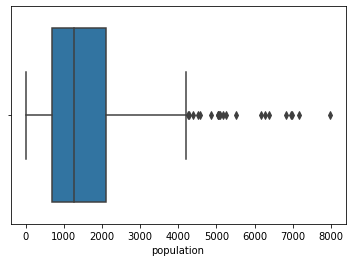

In [55]:
sns.boxplot(df.head(500)['population'], data = df)

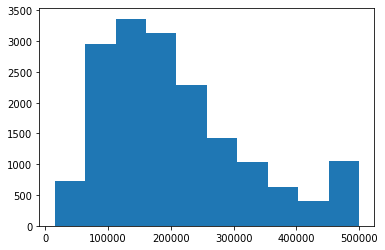

In [73]:
plt.hist(df['median_house_value'])
plt.show()

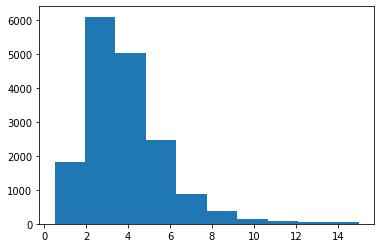

In [74]:
plt.hist(df['median_income'])
plt.show()

In [21]:
map = folium.Map(location = [df.latitude.mean(), df.longitude.mean()], zoom_start = 8)
map

In [30]:
loc = np.array([df.latitude, df.longitude]).T

In [31]:
loc

array([[  34.19, -114.31],
       [  34.4 , -114.47],
       [  33.69, -114.56],
       ...,
       [  41.84, -124.3 ],
       [  41.8 , -124.3 ],
       [  40.54, -124.35]])

In [39]:
folium.plugins.MarkerCluster(loc ).add_to(map)

In [40]:
map